<a href="https://colab.research.google.com/github/BiancadeFrancisco/Arima_Sarimax_Temperature/blob/main/S%C3%89RIES_ATEMPORAIS_ALGORITMO_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTILIZANDO O MÉTODO ARIMA / SARIMAX, VERIFICAR O ERRO MÉDIO ABSOLUTO:

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [ ]:
!pip install scipy

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.3 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
temperatura = pd.read_excel("/content/temperature.xlsx", index_col = "Date", parse_dates=True)
temperatura.head()

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-02-01,17.9
1981-03-01,18.8
1981-04-01,14.6
1981-05-01,15.8


In [ ]:
# TRANSFORMAR COLUNA EM FLOAT:

temperatura["Daily minimum temperatures"] = temperatura["Daily minimum temperatures"].astype(float)

In [ ]:
# COLOCAR EM ORDEM NOSSO INDEX:

temperatura.sort_index(inplace=True)

<Figure size 2000x1000 with 0 Axes>

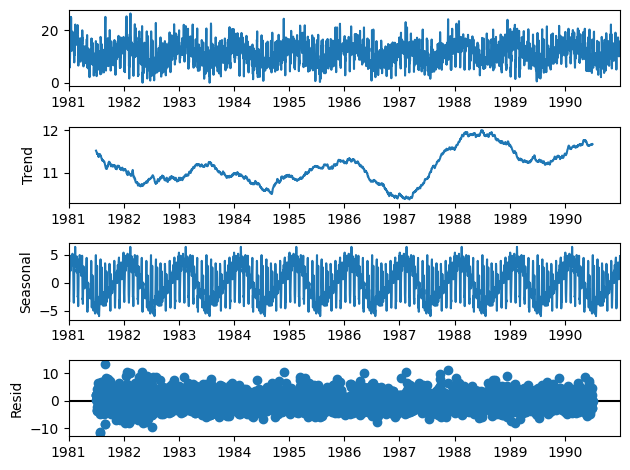

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(temperatura, model = "add", period = 365)

fig = plt.figure(figsize = (20,10))
fig = resultado.plot()


# temos uma tendencia de altas e baixas ao longo do tempo, uma sazonalidade muito presente e um residuo perto da média

In [ ]:
# TESTE DE ESTACIONARIEDADE (indica que não tenho uma sazonalidade):
# Se eu tiver sazonalidade, posso utilizar o algoritmo do Sarima, que irá performar mais.

from statsmodels.tsa.stattools import adfuller

result = adfuller(temperatura["Daily minimum temperatures"].dropna())
print(f"Teste ADF:, {result[0]}")
print(f"p-valor:, {result[1]}")


# temos um p-valor abaixo de 5%
# portanto podemos descartar a nossa hipotese nula (que diz que a série não é estacionaria), descartando a hipótese nula, temos uma série estacionária.

Teste ADF:, -3.331541412968857
p-valor:, 0.01352611219545271


In [ ]:
fit_arima = auto_arima(temperatura, d = 1, start_p = 1, start_q = 1, max_p = 3, max_q = 3,
                       seasonal = True,
                       m = 6,
                       D = 1,
                       start_P = 1,
                       start_Q = 1,
                       max_P = 2,
                       max_Q = 2,
                       information_criterion = "aic",
                       trace = True,
                       error_action = "ignore",
                       stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=20.20 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=22211.573, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=20978.709, Time=0.78 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=4.86 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=22068.931, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=20482.431, Time=1.65 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=15.98 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=5.85 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=20662.364, Time=1.21 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=20418.687, Time=2.34 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=20927.151, Time=1.88 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=20.19 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=10.65 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=20352.684, Time=2.80 sec
 ARIMA(3,1,0)(1,1,0)[6]             : AIC=20872.994

In [ ]:
# COMO TENHO UMA SAZONALIDADE NOS MEUS DADOS, CFME INDICA O MEU TESTE, IREI UTILIZAR O MODELO SARIMA:

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(temperatura, order=(3,1,0), seasonal_order = (2,1,0,6))

resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:        Daily minimum temperatures   No. Observations:                 3647
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 6)   Log Likelihood              -10170.342
Date:                           Tue, 18 Jul 2023   AIC                          20352.684
Time:                                   13:42:25   BIC                          20389.883
Sample:                                        0   HQIC                         20365.933
                                          - 3647                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2718      0.016    -16.992      0.000      -0.303      -0.240
ar.L2         -0.1699      0.016    -10.713      0.000      -0.201      -0.139
ar.L3         -0.1370      0.016     -8.468      0.000      -0.169      -0.105
ar.S.L6       -0.7158      0.015    -47.236      0.000      -0.746      -0.686
ar.S.L12      -0.3666      0.015    -23.968      0.000      -0.397      -0.337
sigma2        15.6300      0.329     47.446      0.000      14.984      16.276
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):                37.89
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.03
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# FAZER O NOSSO PREDICT:
# treinar o modelo, usando como parâmetro 2 meses atras atrás


predicoes = resultado_sarimax.get_prediction(start=-60)
predicoes_media = predicoes.predicted_mean

In [ ]:
intervalo_confianca = predicoes.conf_int()
limite_abaixo = intervalo_confianca.iloc[:, 0]
limite_acima = intervalo_confianca.iloc[:, 1]

limite_abaixo[0], limite_acima[0]

(16.57468625739068, 32.07204772998071)

In [ ]:
predicoes_media[0]


24.323366993685696

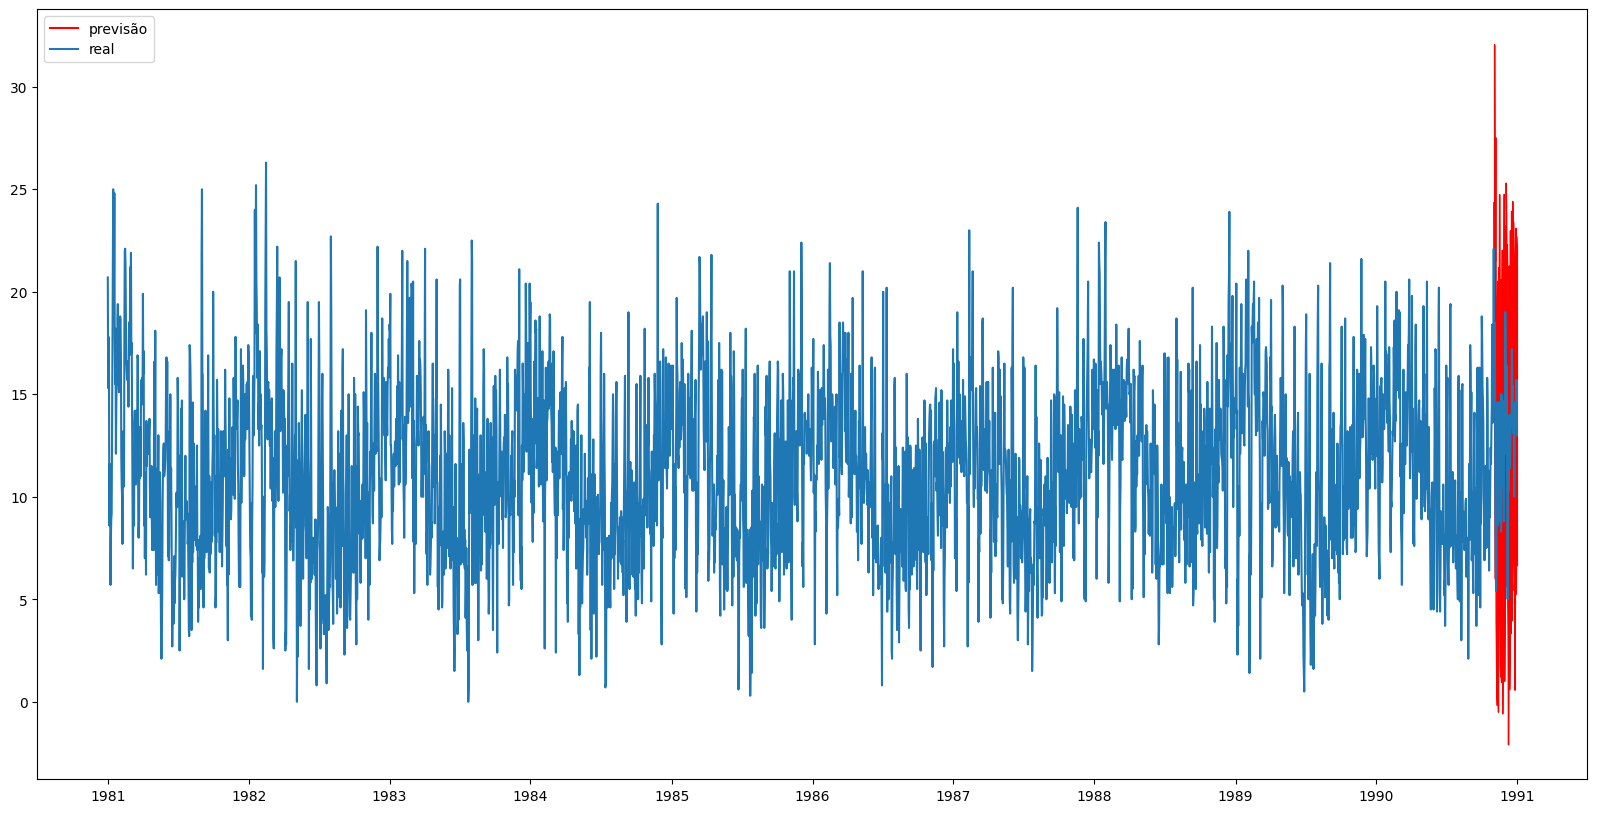

In [ ]:
# VERIFICAR VALOR GRAFICAMENTE:

datas_previsao = np.asarray(predicoes_media.index)
datas = np.asarray(temperatura.index)


plt.figure(figsize=(20,10))
plt.plot(datas_previsao, predicoes_media.values, color="red", label="previsão")
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color="red")
plt.plot(datas, temperatura.values, label="real")
plt.legend(loc="upper left")
plt.show()


# EM VERMELHO: PREVISÃO DE 60 DIAS ATRÁS (PASSADO)

In [ ]:
# verificar erro médio quadrado:

from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(temperatura[-60:].values, predicoes_media.values))
print("RMSE:", rmse)

RMSE: 3.6910302591304567
